# Task 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hcc_train.csv')

In [3]:
#Read column names from description file and assign it to dataframe

c = 'Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class'
c = c.split(',')
df.columns = c


### 1) Identifying the dataset columns into nominal, categorical, continuous etc. categories

In [4]:
#Divide column into Continuous and Nominal values

nominal_cols = ['Gender', 'Symptoms','Alcohol','HBsAg','HBcAb','HCVAb','Cirrhosis','Endemic','Smoking','Diabetes', 'Obesity','Hemochro','AHT', 'CRI','HIV','NASH','Varices','Spleno','PHT','PVT','Metastasis','Hallmark']

numeric_cols = ['Age','Grams_day','Packs_year','PS','Encephalopathy','Ascites','INR','AFP','Hemoglobin','MCV','Leucocytes','Platelets','Albumin','Total_Bil','ALT','AST','GGT','ALP','TP','Creatinine','Nodule','Major_Dim','Dir_Bil','Iron','Sat','Ferritin']


#We will be treating the columns differently considering whether they are nominal or numeric

### 2) Getting the insights about the data

In [5]:
df.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,110.000000,97.000000,110.000000,100.000000,85.0,96.000000,102.000000,110.000000,82.000000,82.000000,...,108.000000,103.000000,104.000000,109.000000,98.000000,83.000000,59.000000,57.000000,57.000000,110.000000
mean,0.827273,0.608247,0.754545,0.120000,0.0,0.302083,0.225490,0.918182,0.073171,0.512195,...,203.150741,9.195146,1.186635,2.844037,6.141837,1.717831,88.567797,39.551579,380.138596,0.654545
std,0.379741,0.490678,0.432326,0.326599,0.0,0.461571,0.419968,0.275342,0.262019,0.502927,...,168.529775,12.512240,1.102045,1.748938,4.540083,4.288699,56.830806,30.860423,436.996762,0.477693
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.280000,3.900000,0.200000,1.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,...,106.000000,6.300000,0.710000,1.000000,3.000000,0.300000,41.000000,17.000000,76.900000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,...,150.500000,7.100000,0.875000,2.000000,4.550000,0.700000,87.000000,27.000000,256.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,...,233.500000,7.500000,1.100000,5.000000,8.300000,1.300000,122.500000,56.000000,489.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 50 columns):
Gender            110 non-null int64
Symptoms          97 non-null float64
Alcohol           110 non-null int64
HBsAg             100 non-null float64
HBeAg             85 non-null float64
HBcAb             96 non-null float64
HCVAb             102 non-null float64
Cirrhosis         110 non-null int64
Endemic           82 non-null float64
Smoking           82 non-null float64
Diabetes          109 non-null float64
Obesity           104 non-null float64
Hemochro          94 non-null float64
AHT               108 non-null float64
CRI               109 non-null float64
HIV               100 non-null float64
NASH              95 non-null float64
Varices           72 non-null float64
Spleno            100 non-null float64
PHT               101 non-null float64
PVT               109 non-null float64
Metastasis        108 non-null float64
Hallmark          109 non-null float64
Age         

In [7]:
#We can observe from the description that the column - HBeAG has mean, min, max, std, etc. all as 0. Which means that is has not been filled correctly or at all.
#So I will be adding it to cols_to_drop array and dropping it

cols_to_drop = ['HBeAg']
df = df.drop(cols_to_drop,axis=1)

In [8]:
df.shape

(110, 49)

In [9]:
df.head(5)

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,1.0,...,106.0,7.6,0.52,1.0,2.1,1.10,94.0,39.0,344.0,1
1,0,1.0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,...,517.0,5.5,0.70,1.0,13.0,0.12,NaN,NaN,NaN,1
2,1,1.0,0,NaN,NaN,NaN,0,0.0,1.0,1.0,...,103.0,6.8,1.24,1.0,10.0,NaN,NaN,NaN,NaN,0
3,1,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,92.0,7.3,0.80,2.0,6.0,0.30,NaN,NaN,NaN,1
4,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,684.0,7.1,0.81,5.0,NaN,NaN,NaN,NaN,NaN,0


### 3) Find the number of null values for each columns

In [10]:
#This will give us the number of null values for every column in our dataframe
df.isnull().sum(axis=0)

Gender             0
Symptoms          13
Alcohol            0
HBsAg             10
HBcAb             14
HCVAb              8
Cirrhosis          0
Endemic           28
Smoking           28
Diabetes           1
Obesity            6
Hemochro          16
AHT                2
CRI                1
HIV               10
NASH              15
Varices           38
Spleno            10
PHT                9
PVT                1
Metastasis         2
Hallmark           1
Age                0
Grams_day         33
Packs_year        36
PS                 0
Encephalopathy     1
Ascites            2
INR                3
AFP                6
Hemoglobin         2
MCV                2
Leucocytes         2
Platelets          2
Albumin            3
Total_Bil          3
ALT                3
AST                2
GGT                2
ALP                2
TP                 7
Creatinine         6
Nodule             1
Major_Dim         12
Dir_Bil           27
Iron              51
Sat               53
Ferritin     

### 4) Getting to know more about the patients

In [11]:
#Data visualization to know more about the patients

import matplotlib.pyplot as plt
import seaborn as sns

#### a) Find the oldest person

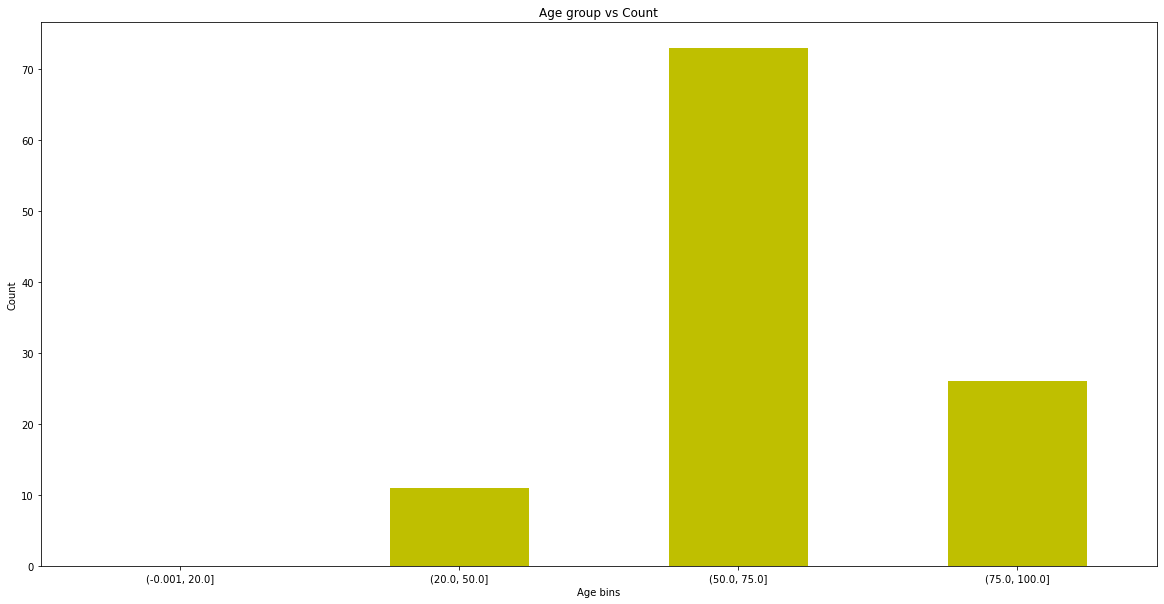

In [12]:
# Plotting datapoints from different age groups
bins = [0, 20, 50, 75, 100]

age_groups = pd.cut(
    df.Age,
    bins=bins,
    include_lowest=True
)

axis = age_groups.value_counts(sort=False).plot.bar(
    rot=0,
    color='y',
    figsize=(20,10)
)

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.title('Age group vs Count')
plt.show()

In [13]:
# Oldest person
df.iloc[df['Age'].idxmax()] #printing row ; Age: 93

Gender                1.00
Symptoms              1.00
Alcohol               1.00
HBsAg                  NaN
HBcAb                  NaN
HCVAb                 0.00
Cirrhosis             1.00
Endemic               0.00
Smoking               0.00
Diabetes              0.00
Obesity               0.00
Hemochro              0.00
AHT                   0.00
CRI                   0.00
HIV                    NaN
NASH                  0.00
Varices               1.00
Spleno                1.00
PHT                   1.00
PVT                   0.00
Metastasis            1.00
Hallmark              0.00
Age                  93.00
Grams_day              NaN
Packs_year            0.00
PS                    2.00
Encephalopathy        1.00
Ascites               1.00
INR                   1.16
AFP                2785.00
Hemoglobin           12.00
MCV                  94.40
Leucocytes            7.90
Platelets         78000.00
Albumin               2.60
Total_Bil             3.50
ALT                  26.00
A

#### b) Find the youngest person

In [14]:
# Youngest person
df.iloc[df['Age'].idxmin()] #printing row: Age: 23

Gender              0.00
Symptoms            1.00
Alcohol             0.00
HBsAg               0.00
HBcAb               1.00
HCVAb               0.00
Cirrhosis           1.00
Endemic             1.00
Smoking             0.00
Diabetes            0.00
Obesity             0.00
Hemochro            0.00
AHT                 0.00
CRI                 0.00
HIV                 0.00
NASH                0.00
Varices              NaN
Spleno              1.00
PHT                 1.00
PVT                 0.00
Metastasis          0.00
Hallmark            1.00
Age                23.00
Grams_day           0.00
Packs_year          0.00
PS                  0.00
Encephalopathy      1.00
Ascites             1.00
INR                 1.17
AFP               358.00
Hemoglobin         12.70
MCV                74.00
Leucocytes          2.20
Platelets          51.00
Albumin             2.90
Total_Bil           2.80
ALT                53.00
AST                41.00
GGT                54.00
ALP                94.00


#### c) Find the average age group

In [15]:
df.Age.mean()
#The elderly (age from 50 to 75) are the average age group 
#Also seen in the plot shown before

66.08181818181818

#### d) Find median age

In [16]:
df.Age.median() 

67.0

#### e) Find the relationship between the deaths and ages(the class column is your prediction variable)

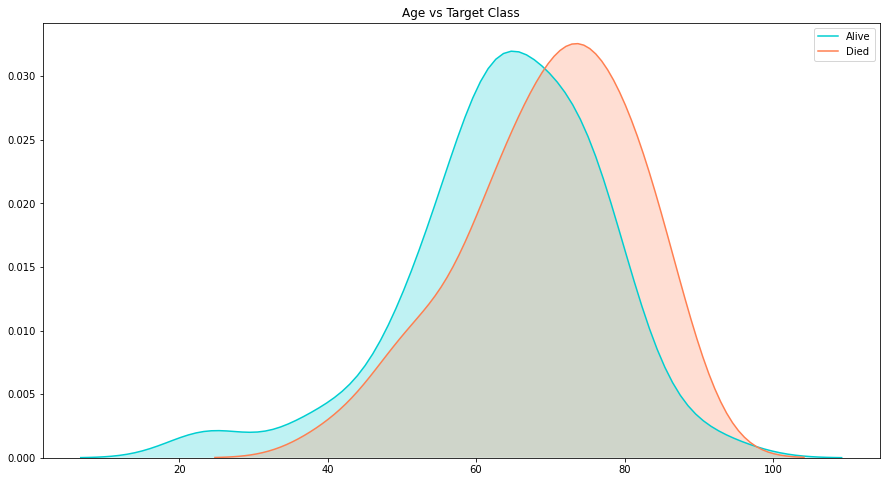

In [17]:
plt.figure(figsize=(15,8))

#Alive 
sns.kdeplot(
    df.Age[df.Class == 1],
    color = 'darkturquoise',
    shade=True
)
#Died
sns.kdeplot(
    df.Age[df.Class == 0],
    color = 'coral',
    shade=True
)



plt.legend(['Alive', 'Died'])
plt.title('Age vs Target Class')
# plt.xlim(0,100)
plt.show()



#### f) Find the age groups whose survival rate is the largest

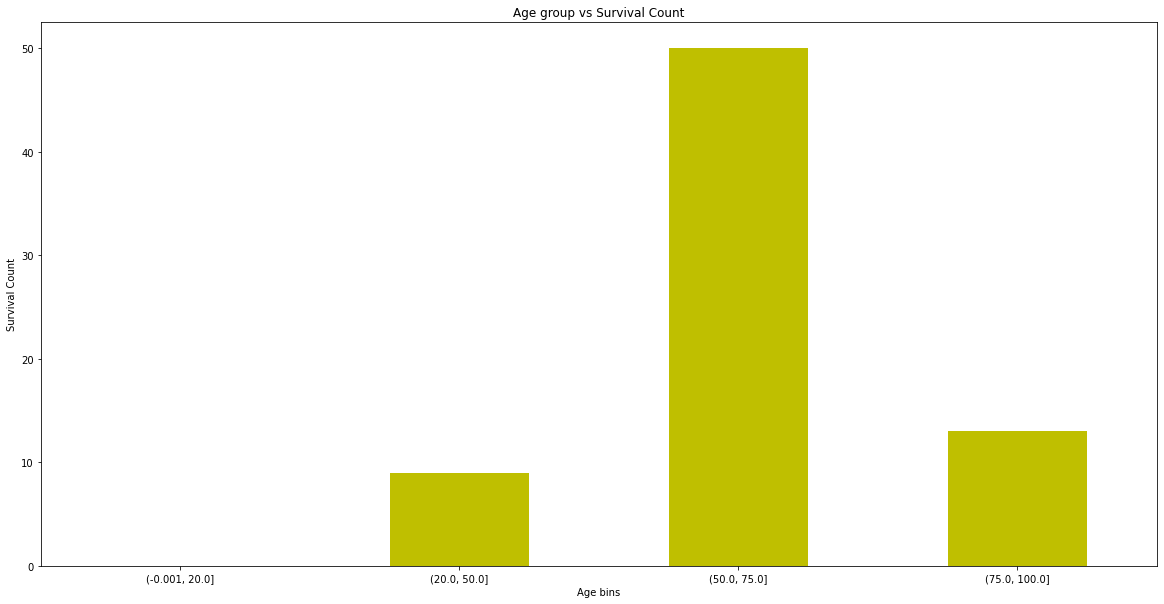

In [18]:
# Plotting datapoints from different age groups
bins = [0, 20, 50, 75, 100]

age_groups_survived = pd.cut(
    df[df['Class'] == 1].Age,
    bins=bins,
    include_lowest=True
)

axis = age_groups_survived.value_counts(sort=False).plot.bar(
    rot=0,
    color='y',
    figsize=(20,10)
)

plt.xlabel('Age bins')
plt.ylabel('Survival Count')
#Survival count is all data rows with Class = 1
plt.title('Age group vs Survival Count')
plt.show()

#The age group whose Survival rate is largest is 50-75 years of age 

#### g) Find similar relationships for at least 3-4 columns that you think can play a role in prediction

[[Text(0, 0, 'Died'), Text(0, 0, 'Alive')]]

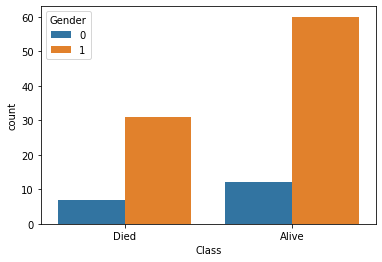

In [19]:
# Looking at the several other columns and their relationships with Target class (Alive or Died)

#Plotting Gender vs Target Class values

ax = sns.countplot(x="Class", hue="Gender", data=df)
ax.set(xticklabels=['Died','Alive'])
#We observe that Gender=1 which is Male has more number of cases and in turn has significantly more male persons alive and dead compared to Female gender
#Thus from this dataset we can say that men have more probability of dying of hcc 

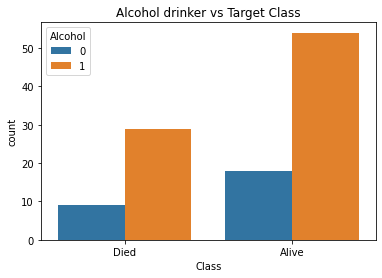

In [20]:
#Plotting Alcohol drinker or not vs Target Class values

ax = sns.countplot(x="Class", hue="Alcohol", data=df)
ax.set(xticklabels=['Died','Alive'])
plt.title('Alcohol drinker vs Target Class')
plt.show()

#Following graph shows the relationship between being an alcohol drinker and hcc patients survival rate

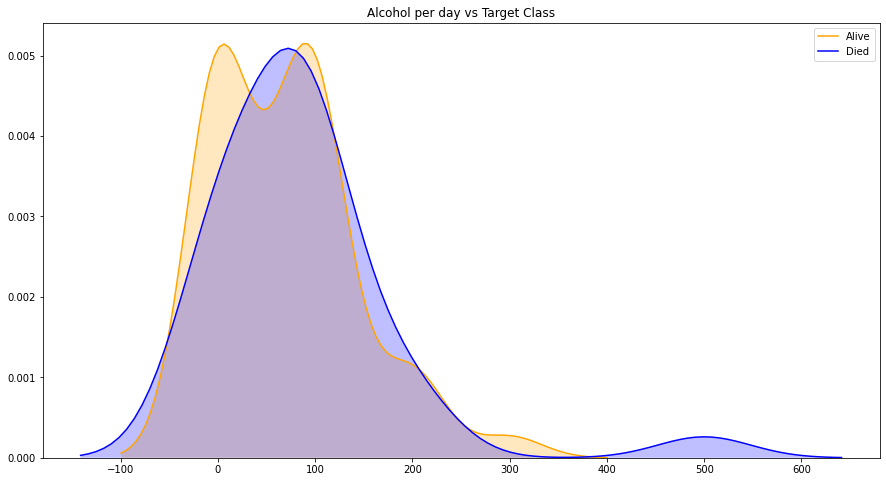

In [21]:
#Plotting Alcohol consumption per day vs Target Class values

plt.figure(figsize=(15,8))

#Alive 
sns.kdeplot(
    df.Grams_day[df.Class == 1],
    color = 'orange',
    shade=True
)
#Died
sns.kdeplot(
    df.Grams_day[df.Class == 0],
    color = 'blue',
    shade=True
)

plt.legend(['Alive', 'Died'])
plt.title('Alcohol per day vs Target Class')
plt.show()
#We can observe that alcohol consumption per day is directly related to deaths


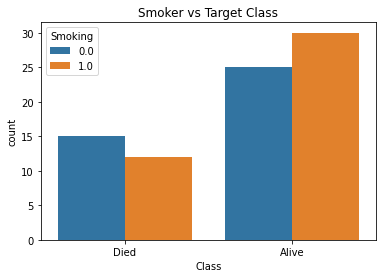

In [22]:
#Plotting smoker's survival rate

ax = sns.countplot(x="Class", hue="Smoking", data=df)
ax.set(xticklabels=['Died','Alive'])
plt.title('Smoker vs Target Class')
plt.show()

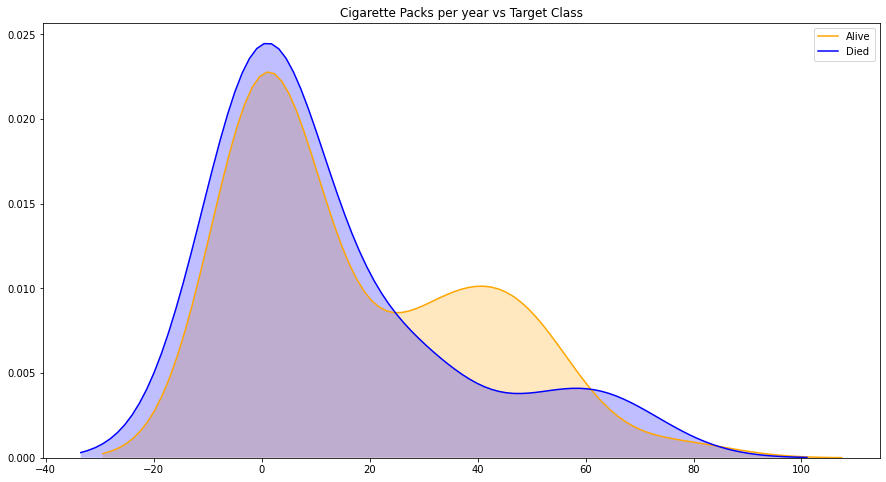

In [23]:
#Plotting packs of cigarettes per year and Target class

plt.figure(figsize=(15,8))

#Alive 
sns.kdeplot(
    df.Packs_year[df.Class == 1],
    color = 'orange',
    shade=True
)
#Died
sns.kdeplot(
    df.Packs_year[df.Class == 0],
    color = 'blue',
    shade=True
)

plt.legend(['Alive', 'Died'])
plt.title('Cigarette Packs per year vs Target Class')
plt.show()

#We can clearly observe that smoking habits are directly proportional to number of cases of HCC and number of deaths as well

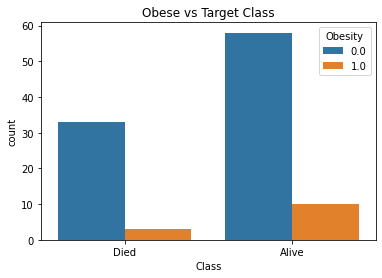

In [24]:
#Plotting obesity and Target class

ax = sns.countplot(x="Class", hue="Obesity", data=df)
ax.set(xticklabels=['Died','Alive'])
plt.title('Obese vs Target Class')
plt.show()

#Obesity does not have much effect on survival rate

#### h) Get more visuals on data distributions

i) Use plotCorrelationMatrix

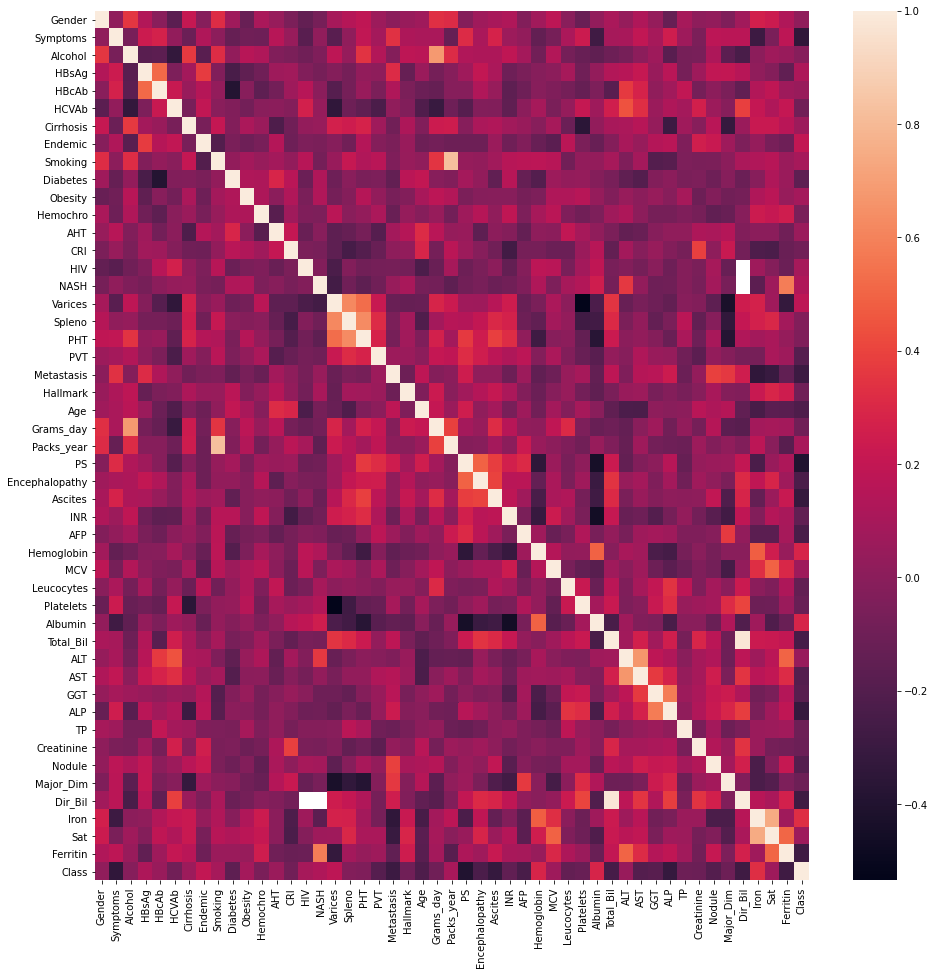

In [25]:
fig, ax = plt.subplots(figsize=(16,16))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

In [26]:
cols_to_lose = ['Ascites','Encephalopathy','PS','Nodule','Age'] #attributes with least correlation with Class column

ii) plotScatterMatrix

/home/purvi/anaconda3/envs/nlp_course/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/purvi/anaconda3/envs/nlp_course/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/purvi/anaconda3/envs/nlp_course/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/purvi/anaconda3/envs/nl

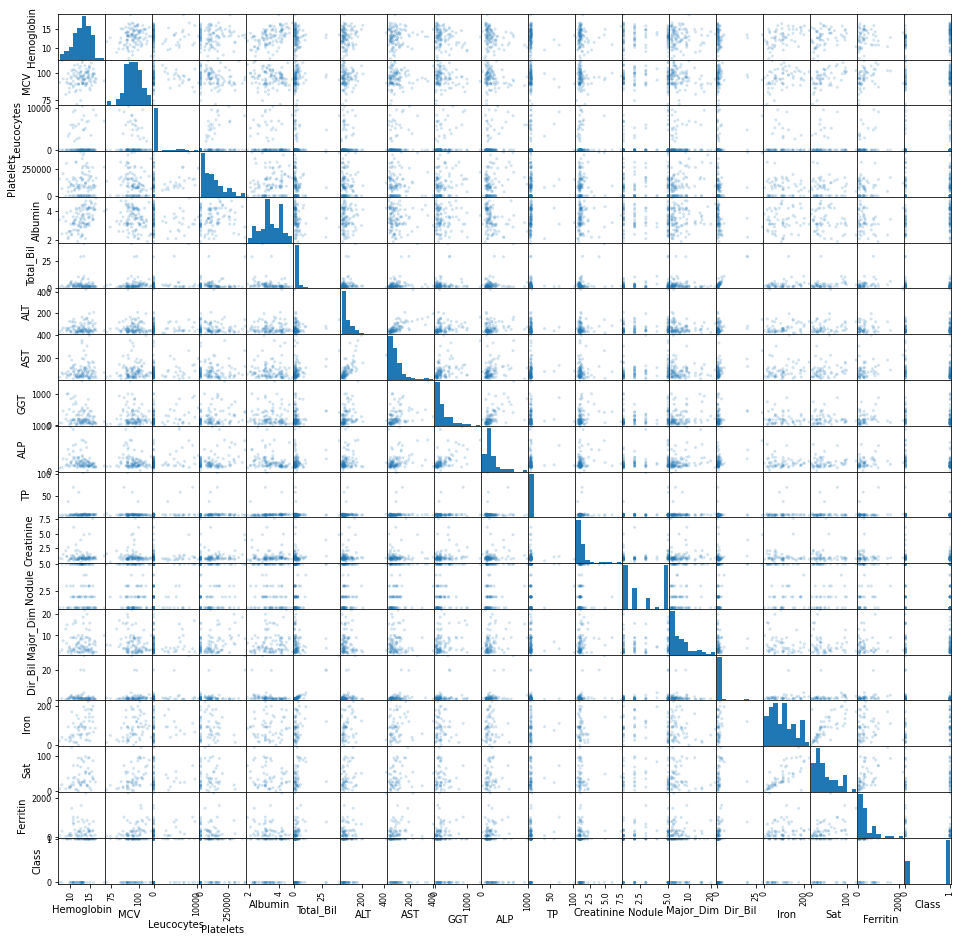

In [27]:
from pandas.plotting import scatter_matrix
df1 = df.iloc[:,30:49]
scatter_matrix(df1, alpha = 0.2, figsize = (16, 16))
plt.show()

iii) plotPerColumnDistribution

/home/purvi/anaconda3/envs/nlp_course/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/purvi/anaconda3/envs/nlp_course/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/purvi/anaconda3/envs/nlp_course/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/purvi/anaconda3/envs/nl

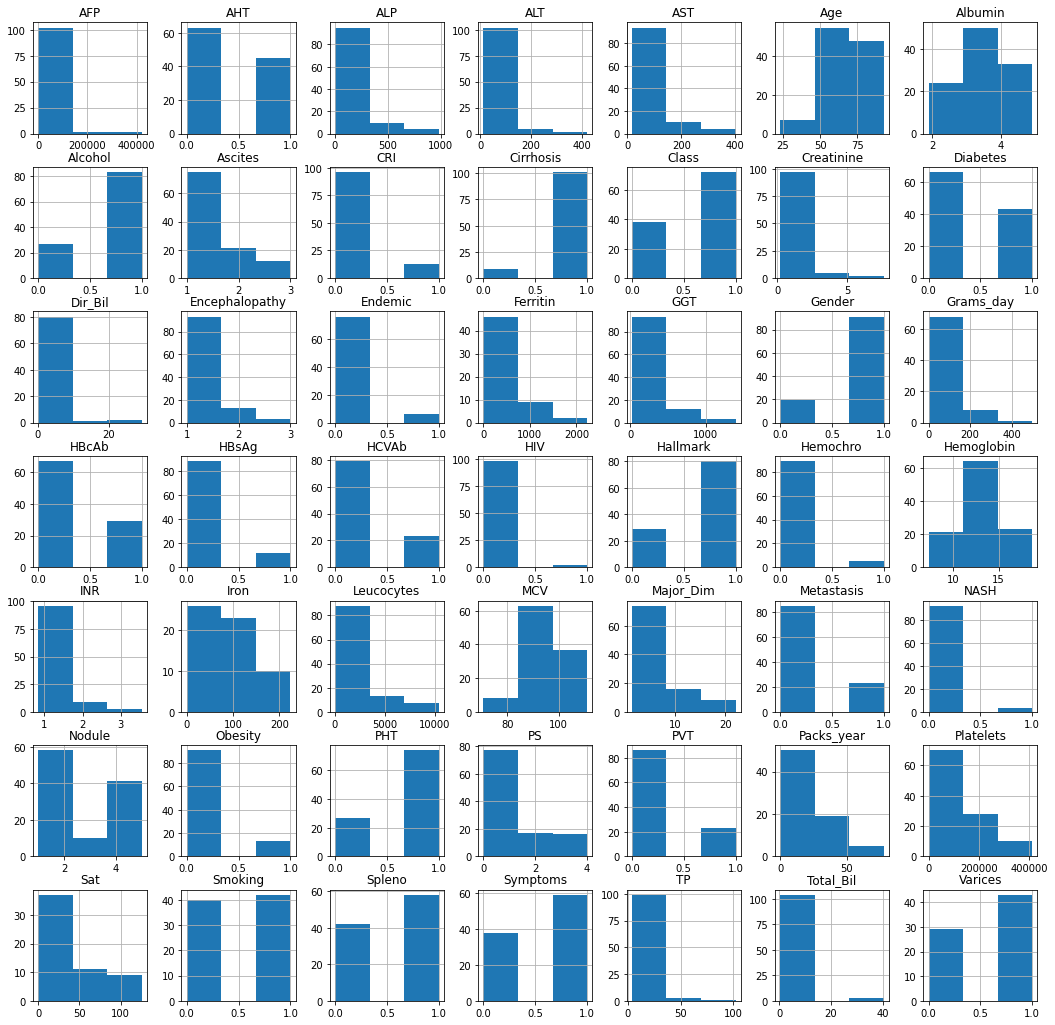

In [28]:
hist = df.hist(bins=3,figsize = (18, 18))

#### i) Find missing values

i) Get the count of missing values

In [29]:
#Total missing values
df.isnull().sum(axis=0).sum()

527

In [30]:
#Missing values per column
df.isnull().sum(axis=0) 

Gender             0
Symptoms          13
Alcohol            0
HBsAg             10
HBcAb             14
HCVAb              8
Cirrhosis          0
Endemic           28
Smoking           28
Diabetes           1
Obesity            6
Hemochro          16
AHT                2
CRI                1
HIV               10
NASH              15
Varices           38
Spleno            10
PHT                9
PVT                1
Metastasis         2
Hallmark           1
Age                0
Grams_day         33
Packs_year        36
PS                 0
Encephalopathy     1
Ascites            2
INR                3
AFP                6
Hemoglobin         2
MCV                2
Leucocytes         2
Platelets          2
Albumin            3
Total_Bil          3
ALT                3
AST                2
GGT                2
ALP                2
TP                 7
Creatinine         6
Nodule             1
Major_Dim         12
Dir_Bil           27
Iron              51
Sat               53
Ferritin     

In [31]:
#Let's also drop duplicate rows if any 

df = df.drop_duplicates() 

ii) Plot a heat map for missing values

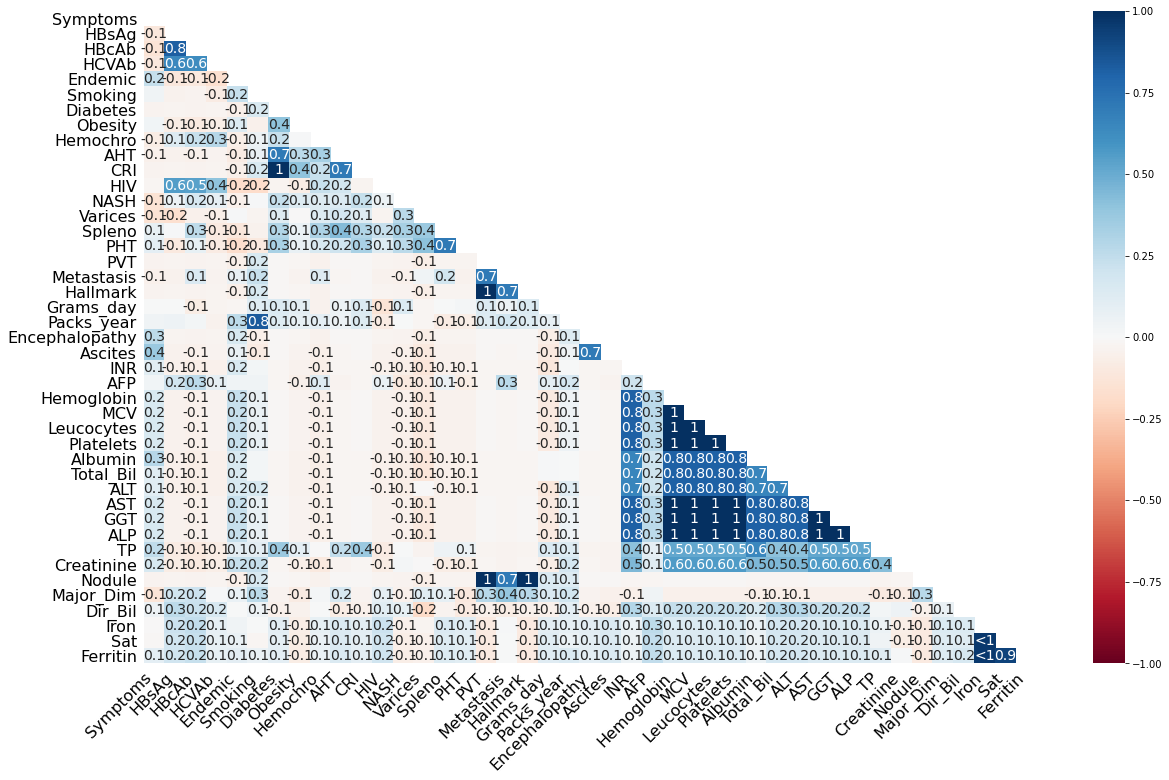

In [32]:
#I will be using the library - missingno to plot missing values with a heatmap 

import missingno as msno 
msno.heatmap(df)

#### j) Applying a different technique to handle missing values (For each technique verify your prediction results)

i) Use dropna

In [33]:
df.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,110.000000,97.000000,110.000000,100.000000,96.000000,102.000000,110.000000,82.000000,82.000000,109.000000,...,108.000000,103.000000,104.000000,109.000000,98.000000,83.000000,59.000000,57.000000,57.000000,110.000000
mean,0.827273,0.608247,0.754545,0.120000,0.302083,0.225490,0.918182,0.073171,0.512195,0.394495,...,203.150741,9.195146,1.186635,2.844037,6.141837,1.717831,88.567797,39.551579,380.138596,0.654545
std,0.379741,0.490678,0.432326,0.326599,0.461571,0.419968,0.275342,0.262019,0.502927,0.491000,...,168.529775,12.512240,1.102045,1.748938,4.540083,4.288699,56.830806,30.860423,436.996762,0.477693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.280000,3.900000,0.200000,1.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,106.000000,6.300000,0.710000,1.000000,3.000000,0.300000,41.000000,17.000000,76.900000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,150.500000,7.100000,0.875000,2.000000,4.550000,0.700000,87.000000,27.000000,256.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,233.500000,7.500000,1.100000,5.000000,8.300000,1.300000,122.500000,56.000000,489.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


In [34]:
df.shape

(110, 49)

In [35]:
df_dropna = df.dropna(thresh=40) #Only rows with more than 10 null values will be dropped
df_dropna=df_dropna.dropna(axis=1, thresh=90) #Drop those columns having at least 90 non null values (80%)
print('Shape:',df_dropna.shape)
#We can see that rows with more than 10 features having null values are dropped
df_dropna.shape
df_dropna.isnull().sum(axis=0).sum()

Shape: (102, 40)


117

In [36]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 109
Data columns (total 40 columns):
Gender            102 non-null int64
Symptoms          90 non-null float64
Alcohol           102 non-null int64
HBsAg             96 non-null float64
HBcAb             93 non-null float64
HCVAb             96 non-null float64
Cirrhosis         102 non-null int64
Diabetes          102 non-null float64
Obesity           97 non-null float64
Hemochro          90 non-null float64
AHT               101 non-null float64
CRI               102 non-null float64
HIV               94 non-null float64
NASH              90 non-null float64
Spleno            95 non-null float64
PHT               94 non-null float64
PVT               101 non-null float64
Metastasis        101 non-null float64
Hallmark          101 non-null float64
Age               102 non-null int64
PS                102 non-null int64
Encephalopathy    101 non-null float64
Ascites           100 non-null float64
INR               

ii) Use replace na with zero or max value

In [37]:
df_zerona = df.fillna(0)
df_zerona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 49 columns):
Gender            110 non-null int64
Symptoms          110 non-null float64
Alcohol           110 non-null int64
HBsAg             110 non-null float64
HBcAb             110 non-null float64
HCVAb             110 non-null float64
Cirrhosis         110 non-null int64
Endemic           110 non-null float64
Smoking           110 non-null float64
Diabetes          110 non-null float64
Obesity           110 non-null float64
Hemochro          110 non-null float64
AHT               110 non-null float64
CRI               110 non-null float64
HIV               110 non-null float64
NASH              110 non-null float64
Varices           110 non-null float64
Spleno            110 non-null float64
PHT               110 non-null float64
PVT               110 non-null float64
Metastasis        110 non-null float64
Hallmark          110 non-null float64
Age               110 non-null int64
Grams_

iii) Use replace na with mean

In [38]:
#I will be replacing the nominal columns with mode of those columns and numerical columns with their mean 

dataHCC = df_dropna
for i in nominal_cols:
    if i in dataHCC.columns:
        dataHCC[i] = dataHCC[i].fillna(dataHCC[i].mode()[0])
        

In [39]:
# Now I will be replacing numerical columns with their mean

for i in numeric_cols:
    if i in dataHCC.columns:
        dataHCC[i] = dataHCC[i].fillna(dataHCC[i].mean())
        

dataHCC.head()

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Class
0,1,0.0,1,0.0,0.0,0.0,1,1.0,1.0,0.0,...,3.70,43.000000,63.0,175.0,106.0,7.6,0.52,1.0,2.100000,1
1,0,1.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.32,37.000000,44.0,80.0,517.0,5.5,0.70,1.0,13.000000,1
3,1,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,1.30,18.000000,26.0,174.0,92.0,7.3,0.80,2.0,6.000000,1
4,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.60,162.000000,354.0,1390.0,684.0,7.1,0.81,5.0,5.947312,0
5,1,1.0,0,0.0,1.0,1.0,1,0.0,0.0,0.0,...,1.00,62.752475,87.0,120.0,108.0,102.0,0.68,3.0,2.000000,0


In [40]:
#Let's check if all null values are filled
dataHCC.describe()
#No more NaN values

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Class
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.843137,0.627451,0.784314,0.107843,0.284314,0.196078,0.941176,0.382353,0.127451,0.049020,...,2.712970,62.752475,88.205882,251.65000,193.767451,9.317347,1.152449,2.881188,5.947312,0.666667
std,0.365467,0.485871,0.413329,0.311714,0.453315,0.398989,0.236456,0.488362,0.335124,0.216975,...,4.201241,54.453978,69.972744,247.88642,150.095497,12.560413,1.051461,1.742237,4.218948,0.473732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300000,13.000000,17.000000,23.00000,1.280000,3.900000,0.200000,1.000000,1.500000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.900000,30.250000,42.250000,89.25000,106.000000,6.325000,0.710000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.400000,43.000000,67.500000,164.50000,150.500000,7.100000,0.865000,2.000000,4.800000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,3.075000,76.750000,107.750000,334.75000,230.250000,7.600000,1.107500,5.000000,7.475000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.900000,420.000000,401.000000,1390.00000,980.000000,102.000000,7.600000,5.000000,22.000000,1.000000


In [41]:
dataHCC.head()

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Class
0,1,0.0,1,0.0,0.0,0.0,1,1.0,1.0,0.0,...,3.70,43.000000,63.0,175.0,106.0,7.6,0.52,1.0,2.100000,1
1,0,1.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.32,37.000000,44.0,80.0,517.0,5.5,0.70,1.0,13.000000,1
3,1,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,1.30,18.000000,26.0,174.0,92.0,7.3,0.80,2.0,6.000000,1
4,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.60,162.000000,354.0,1390.0,684.0,7.1,0.81,5.0,5.947312,0
5,1,1.0,0,0.0,1.0,1.0,1,0.0,0.0,0.0,...,1.00,62.752475,87.0,120.0,108.0,102.0,0.68,3.0,2.000000,0


In [42]:
new_c = dataHCC.columns

iv) Search for additional techniques to handle null values, excluding the above three and test.

In [43]:
#I can also use knn to impute the missing values for Numerical valued  attributes
#I will still be replacing by mode of column for Nominal attributes


df_imputed = df_dropna
for i in nominal_cols:
    if i in df_imputed.columns:
        df_imputed[i] = df_imputed[i].fillna(df_imputed[i].mode()[0])
        
# I will now impute missing values using KNN for Numerical attributes

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
num_cols = []
for i in numeric_cols:
    if i in df_imputed.columns:
        num_cols.append(i)
df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])
df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = new_c


In [44]:
df_imputed.head()

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Class
0,1,0.0,1,0.0,0.0,0.0,1,1.0,1.0,0.0,...,3.70,43.000000,63.0,175.0,106.0,7.6,0.52,1.0,2.100000,1
1,0,1.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.32,37.000000,44.0,80.0,517.0,5.5,0.70,1.0,13.000000,1
3,1,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,1.30,18.000000,26.0,174.0,92.0,7.3,0.80,2.0,6.000000,1
4,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.60,162.000000,354.0,1390.0,684.0,7.1,0.81,5.0,5.947312,0
5,1,1.0,0,0.0,1.0,1.0,1,0.0,0.0,0.0,...,1.00,62.752475,87.0,120.0,108.0,102.0,0.68,3.0,2.000000,0


In [45]:
#Test if NaN values replaced
df_imputed.describe()
#No more NaN values

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Class
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.843137,0.627451,0.784314,0.107843,0.284314,0.196078,0.941176,0.382353,0.127451,0.049020,...,2.712970,62.752475,88.205882,251.65000,193.767451,9.317347,1.152449,2.881188,5.947312,0.666667
std,0.365467,0.485871,0.413329,0.311714,0.453315,0.398989,0.236456,0.488362,0.335124,0.216975,...,4.201241,54.453978,69.972744,247.88642,150.095497,12.560413,1.051461,1.742237,4.218948,0.473732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300000,13.000000,17.000000,23.00000,1.280000,3.900000,0.200000,1.000000,1.500000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.900000,30.250000,42.250000,89.25000,106.000000,6.325000,0.710000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.400000,43.000000,67.500000,164.50000,150.500000,7.100000,0.865000,2.000000,4.800000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,3.075000,76.750000,107.750000,334.75000,230.250000,7.600000,1.107500,5.000000,7.475000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.900000,420.000000,401.000000,1390.00000,980.000000,102.000000,7.600000,5.000000,22.000000,1.000000


VERIFY PREDICTION RESULTS FOR EACH TECHNIQUE USED ABOVE

In [46]:
def test_model(df,model_name):
    data = df 
    
    y = data['Class']
    x = data.drop(["Class"], 1)
    c = x.columns
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    min_max_scaler = MinMaxScaler()
    x = pd.DataFrame(min_max_scaler.fit_transform(x))

    x.columns = c
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    from sklearn import svm
  
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    
    
    print(f'Using {model_name}')
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1 Score:",metrics.f1_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("")
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    rms = sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE',rms)

In [47]:
#Testing for df_dropna
test_model(df_dropna,'Dropping NaN rows')

Using Dropping NaN rows
Accuracy: 0.6666666666666666
F1 Score: 0.7586206896551724
Precision: 0.7857142857142857
Recall: 0.7333333333333333

RMSE 0.5773502691896257


In [48]:
#Testing for df_xerona 
test_model(df_zerona,'Replacing NaN with zeros')

Using Replacing NaN with zeros
Accuracy: 0.7272727272727273
F1 Score: 0.8125
Precision: 0.8666666666666667
Recall: 0.7647058823529411

RMSE 0.5222329678670935


In [49]:
#Testing for df where NaN replaced with mean
test_model(dataHCC,'Replacing NaN with mean and mode')

Using Replacing NaN with mean and mode
Accuracy: 0.6666666666666666
F1 Score: 0.7200000000000001
Precision: 0.9
Recall: 0.6

RMSE 0.5773502691896257


In [50]:
#Testing for df where NaN imputed using KNN
test_model(df_imputed,'Imputing NaN values using KNN')

Using Imputing NaN values using KNN
Accuracy: 0.6666666666666666
F1 Score: 0.7741935483870968
Precision: 0.7058823529411765
Recall: 0.8571428571428571

RMSE 0.5773502691896257


In [51]:
#Replacing values with mean and mode gave the best result 
#So I will be using that for my finals predictions

#### k) Applying the feature scaling technique if required.

In [52]:
#ON TRAINING DATASET

data = dataHCC
#.drop(cols_to_lost,axis=1)
y_vals = data['Class']
x_vals = data.drop(['Class'], axis=1)
# x_vals = x_vals.drop(cols_to_lose,axis=1)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
x_vals = pd.DataFrame(scaler.fit_transform(x_vals))
x_vals.columns = c[:39]

In [54]:
#Loading hcc_test data
test = pd.read_csv('hcc_test.csv')
test.head()

,id,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,5,1,0.0,1,0.0,NaN,0.0,0.0,1,0.0,...,242.0,396.0,5.6,0.90,1.0,10.0,1.4,53.0,22.0,111.0
1,9,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,...,256.0,303.0,7.1,0.59,1.0,9.3,0.7,NaN,NaN,NaN
2,17,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,...,459.0,146.0,5.4,1.23,5.0,13.5,3.8,187.0,58.0,443.0
3,23,1,1.0,1,0.0,0.0,0.0,0.0,1,1.0,...,879.0,396.0,7.0,0.53,5.0,15.0,1.6,NaN,NaN,NaN
4,26,1,1.0,1,NaN,NaN,NaN,1.0,1,0.0,...,252.0,172.0,8.1,0.83,1.0,5.0,0.7,NaN,NaN,NaN


In [55]:
#Applying NaN replacement techniques on test dataset


#Removing id column and storing in a dataframe
test_df = test.iloc[:,1:50]
test_df.head()

#Setting columns names for better understanding and readability
test_df.columns = c[:49]



In [56]:
# FILLING MISSING VALUE using the techniques used for training dataset

for i in nominal_cols:
     test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
        
for i in numeric_cols:
     test_df[i] = test_df[i].fillna(test_df[i].mean())


In [57]:
#Applying feature scaling ON TEST DATASET
test_df = pd.DataFrame(scaler.fit_transform(test_df))
test_df.columns = c[:49]

In [62]:
#also dropping columns dropped for training set in test data as well 
for i in test_df.columns:
    if i not in new_c:
        test_df = test_df.drop([i],axis=1)

In [63]:
test_df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim
0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,0.034483,-0.80000,-0.444444,-0.608209,-0.717784,-0.243011,-0.983562,-0.635088,-0.6,-0.081081
1,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,...,0.586207,-0.98750,-0.583333,-0.895522,-0.699742,-0.443011,-0.942466,-0.852632,-0.6,-0.156757
2,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,0.310345,-0.98750,-0.687500,-0.723881,-0.438144,-0.780645,-0.989041,-0.403509,1.0,0.297297
3,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,0.172414,-0.78125,0.430556,-0.742537,0.103093,-0.243011,-0.945205,-0.894737,1.0,0.459459
4,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,...,-0.034483,-0.93750,0.159722,0.149254,-0.704897,-0.724731,-0.915068,-0.684211,-0.6,-0.621622


#### l) Applying the regression models that you think is most suited for this problem.

TRAINING the model with Training dataset (dataHCC: x_vals, y_vals)

In [64]:
#Splitting data into training and test
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_vals,y_vals,test_size=0.2)



#Before directly applying my model I will be using GridSearchCV for hyperparameter tuning for my svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV


param_grid = [
  {'C': [0.001,0.01,0.1,1,10,100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.001, 0.0001], 'kernel': ['rbf', 'poly']},
 ]

grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)




{'C': 0.1, 'kernel': 'linear'}


In [65]:
#We see that the best parameter would be kernel = linear and c=0.1 
#So we will be using that 

#Training the model and predicting data
from sklearn import svm

clf = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [66]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("")
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rms)
print("")


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.7619047619047619
F1 Score: 0.8275862068965518
Precision: 0.8
Recall: 0.8571428571428571

RMSE 0.4879500364742666

[[ 4  3]
 [ 2 12]]


In [67]:
# Predicting with training dataset just to crossvalidate and check if any overfitting is occuring
X_train_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(X_train_pred, y_train))
print("F1 Score:",metrics.f1_score(X_train_pred, y_train))
print("Precision:",metrics.precision_score(X_train_pred, y_train))
print("Recall:",metrics.recall_score(X_train_pred, y_train))
print("")

rms = sqrt(mean_squared_error(X_train_pred, y_train))
print('RMSE',rms)
print("")

Accuracy: 0.8271604938271605
F1 Score: 0.8627450980392156
Precision: 0.8148148148148148
Recall: 0.9166666666666666

RMSE 0.41573970964154905



In [68]:
#Predicting for hcc_test data 


In [69]:
predictions = clf.predict(test_df)

In [70]:
predictions = pd.DataFrame(predictions,columns=['answer'])
predictions.head()

,answer
0,1
1,1
2,0
3,0
4,0


In [71]:
#Will upload the result.csv file to Kaggle for submission
result = pd.concat([test['id'], predictions['answer']], axis=1)
result.to_csv('result.csv',index=False)


#### m) At least one of the models used to compute should be your own implementation using NumPy.

In [72]:
#Now using my own model to predict for hcc_test dataset
#Here I will be using Logistic regression to classify datapoints and predict survival rate

# I have the cleaned data with NaN values replaced in test_df

test_df.head() #Scaled test dataframe

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Diabetes,Obesity,Hemochro,...,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim
0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,0.034483,-0.80000,-0.444444,-0.608209,-0.717784,-0.243011,-0.983562,-0.635088,-0.6,-0.081081
1,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,...,0.586207,-0.98750,-0.583333,-0.895522,-0.699742,-0.443011,-0.942466,-0.852632,-0.6,-0.156757
2,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,0.310345,-0.98750,-0.687500,-0.723881,-0.438144,-0.780645,-0.989041,-0.403509,1.0,0.297297
3,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,0.172414,-0.78125,0.430556,-0.742537,0.103093,-0.243011,-0.945205,-0.894737,1.0,0.459459
4,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,...,-0.034483,-0.93750,0.159722,0.149254,-0.704897,-0.724731,-0.915068,-0.684211,-0.6,-0.621622


In [73]:
#I will need numpy for making my own model

import numpy as np

#Code for logistic regression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def summation(t, x):
    return np.dot(x, t)

def calc_prob(t, x):
    return sigmoid(summation(t, x))

# 1. Compute cost function
def cost(t, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(calc_prob(t, x)) + (1 - y) * np.log(
            1 - calc_prob(t, x)))
    return total_cost


# 2. Compute Gradient function
def grad(t, x, y):
    # calculates gradient of cost function at t = theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(summation(t, x)) - y)

In [74]:
def calculateweights(theta,x,y):
    w = theta;
    l = 1
    for i in range(50):
        f = cost( w, x, y)
        g = grad( w, x, y)
        w = w - l * g
    return w

In [75]:
# I have my training dataset as follows
x_vals.columns
data = pd.DataFrame(pd.concat([x_vals,y_vals],axis=1))

In [76]:
data['Class'] = df['Class']

In [77]:
train, test = train_test_split(data, test_size=0.25)

In [78]:
print(train.shape)
print(test.shape)


(82, 40)
(28, 40)


In [79]:
x0 = np.ones(train.shape[0]).reshape(82,1)

train = np.append(x0,train, axis=1)

In [80]:
train.shape

(82, 41)

In [81]:
x_train = train[:,:40].reshape(82,40)
y_train = train[:,40].reshape(82,1)
theta = np.zeros((data.shape[1], 1))

In [82]:
theta.shape

(40, 1)

In [83]:
#Calculating weights for each feature
weights = calculateweights(theta,x_train,y_train)


In [84]:
y_train.shape

(82, 1)

In [85]:
weights.shape

(40, 1)

In [86]:
test = np.append(np.ones(test.shape[0]).reshape(28,1),test,axis=1)


In [87]:
test.shape

(28, 41)

In [88]:

x_test = test[:,:40].reshape(28,40)
y_test = test[:,40].reshape(28,1)

In [89]:
#predicting y values
y_pred = x_test.dot(weights)
y_pred = calc_prob(weights,x_test)

In [90]:

y_pred = np.array([1 if (val>0.5) else 0 for val in y_pred])
y_test = np.array([1 if (val>0.5) else 0 for val in y_test])

In [91]:
#Calculate accuracy

from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))

0.32142857142857145


# Task 2

In [92]:
hcc_data_complete = pd.read_csv('hcc_train.csv')

In [93]:
hcc_data_complete.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,106.0,7.6,0.52,1.0,2.1,1.10,94.0,39.0,344.0,1
1,0,1.0,0,NaN,NaN,NaN,NaN,0,0.0,0.0,...,517.0,5.5,0.70,1.0,13.0,0.12,NaN,NaN,NaN,1
2,1,1.0,0,NaN,NaN,NaN,NaN,0,0.0,1.0,...,103.0,6.8,1.24,1.0,10.0,NaN,NaN,NaN,NaN,0
3,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,...,92.0,7.3,0.80,2.0,6.0,0.30,NaN,NaN,NaN,1
4,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,...,684.0,7.1,0.81,5.0,NaN,NaN,NaN,NaN,NaN,0


In [94]:
hcc_data_complete.columns = c

In [95]:
hcc_data_complete.shape

(110, 50)

In [96]:
#Replacing missing values for this new dataset

hcc_data_complete = hcc_data_complete.dropna(thresh=40) #Only rows with more than 10 null values will be dropped
hcc_data_complete=hcc_data_complete.dropna(axis=1, thresh=90) #Drop those columns having more than 90 null values (80%)
print('Shape:',df_dropna.shape)

for i in nominal_cols:
    if i in hcc_data_complete.columns:
        hcc_data_complete[i] = hcc_data_complete[i].fillna(hcc_data_complete[i].mode()[0])
        
for i in numeric_cols:
    if i in hcc_data_complete.columns:
        hcc_data_complete[i] = hcc_data_complete[i].fillna(hcc_data_complete[i].mean())


Shape: (102, 40)


In [97]:
data_x = hcc_data_complete.iloc[:,:39]
data_y = hcc_data_complete.iloc[:,39:40]

In [98]:
#Scaling data

minmax = MinMaxScaler(feature_range=(-1,1))
data_x = pd.DataFrame(minmax.fit_transform(data_x))

In [99]:
#I will be using SVM Model now 

X_train_cmp, X_test_cmp, y_train_cmp, y_test_cmp = train_test_split(x_vals,y_vals,test_size=0.2)



In [100]:
#Training the model and predicting data


classifier = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
classifier.fit(X_train_cmp,y_train_cmp)
pred = classifier.predict(X_test_cmp)


Accuracy: 0.6666666666666666
F1 Score: 0.6666666666666666
Precision: 0.6363636363636364
Recall: 0.7

RMSE 0.5773502691896257

[[7 4]
 [3 7]]
Confusion matrix, without normalization
[[21  2]
 [ 7 51]]
Normalized confusion matrix
[[0.91304348 0.08695652]
 [0.12068966 0.87931034]]


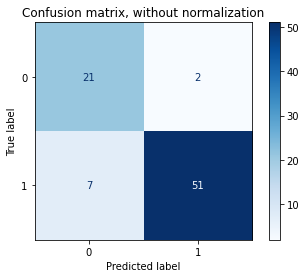

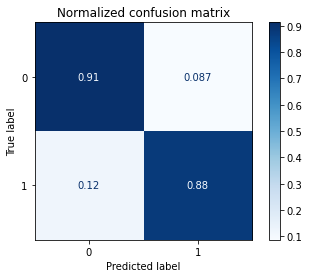

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test_cmp, pred))
print("F1 Score:",metrics.f1_score(y_test_cmp, pred))
print("Precision:",metrics.precision_score(y_test_cmp, pred))
print("Recall:",metrics.recall_score(y_test_cmp, pred))
print("")
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import plot_confusion_matrix

rms = sqrt(mean_squared_error(y_test_cmp, pred))
print('RMSE',rms)
print("")


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_cmp,pred))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier,X_train_cmp,y_train_cmp,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Metrics in Task1: 
    Accuracy: 0.7619047619047619
    F1 Score: 0.8275862068965518
    Precision: 0.8
    Recall: 0.8571428571428571

Metrics in Task2: 
    Accuracy: 0.6666666666666666
    F1 Score: 0.6666666666666666
    Precision: 0.6363636363636364
    Recall: 0.7
    
    
We can observe that the prediction was better in Task1

# Task 3

### Apply feature transform on the features used in task 1

In [284]:
#Applying feature tranform on features used in Task1

from sklearn.preprocessing import PolynomialFeatures
#Dataset from Task1 : dataHCC - x_vals, y_vals
data_x = x_vals
data_y = y_vals
data_x.describe()


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.686275,0.254902,0.568627,-0.784314,-0.431373,-0.607843,0.882353,-0.235294,-0.745098,-0.901961,...,0.036502,-0.831261,-0.755516,-0.629136,-0.665472,-0.606655,-0.889555,-0.742581,-0.059406,-0.566116
std,0.730934,0.971742,0.826657,0.623428,0.906629,0.797978,0.472912,0.976724,0.670249,0.433950,...,0.474891,0.293793,0.267587,0.364441,0.362672,0.306718,0.256074,0.284179,0.871118,0.411605
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,-0.266667,-0.958042,-0.915233,-0.868490,-0.903072,-0.786006,-0.950561,-0.862162,-1.000000,-0.853659
50%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,0.031584,-0.923077,-0.852580,-0.736979,-0.792977,-0.695071,-0.934760,-0.820270,-0.500000,-0.678049
75%,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,...,0.466667,-0.805944,-0.686732,-0.527344,-0.543892,-0.532103,-0.924567,-0.754730,1.000000,-0.417073
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### a) Does varying the polynomial degree change your accuracy?

In [285]:
error = []

In [286]:
#DEGREE = 1

X_transform = pd.DataFrame(PolynomialFeatures(1).fit_transform(data_x))



In [287]:
#Splitting into train and test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transform,y_vals,test_size=0.2)

In [288]:
#Training and predicted with transformed features
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

print("Using polynomial features of degree 1")
acc = metrics.accuracy_score(ytest, ypred)
error.append(1-acc)
print("Accuracy:",acc)

Using polynomial features of degree 1
Accuracy: 0.6190476190476191


In [289]:
#DEGREE = 2
X_transform = pd.DataFrame(PolynomialFeatures(2).fit_transform(data_x))

In [290]:
#Splitting into train and test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transform,y_vals,test_size=0.2)

In [291]:
#Training and predicted with transformed features
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

print("Using polynomial features of degree 2")
acc = metrics.accuracy_score(ytest, ypred)
error.append(1-acc)
print("Accuracy:",acc)

Using polynomial features of degree 2
Accuracy: 0.8095238095238095


In [292]:
#DEGREE 3 
X_transform = pd.DataFrame(PolynomialFeatures(3).fit_transform(data_x))

In [293]:
#Splitting into train and test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transform,y_vals,test_size=0.2)

In [294]:
#Training and predicted with transformed features
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

print("Using polynomial features of degree 3")
acc = metrics.accuracy_score(ytest, ypred)
error.append(1- acc)
print("Accuracy:",acc)

Using polynomial features of degree 3
Accuracy: 0.7619047619047619


In [295]:
#DEGREE = 4
X_transform = pd.DataFrame(PolynomialFeatures(4).fit_transform(data_x))

In [296]:
#Splitting into train and test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transform,y_vals,test_size=0.2)

In [297]:
#Training and predicted with transformed features
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

print("Using polynomial features of degree 4")
acc = metrics.accuracy_score(ytest, ypred)
error.append(1-acc)
print("Accuracy:",acc)

Using polynomial features of degree 4
Accuracy: 0.7142857142857143


In [298]:
#DEGREE = 5
X_transform = pd.DataFrame(PolynomialFeatures(5).fit_transform(data_x))

In [299]:
#Splitting into train and test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transform,y_vals,test_size=0.2)

In [300]:
#Training and predicted with transformed features
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True,C=0.1, class_weight='balanced')
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

print("Using polynomial features of degree 5")
acc = metrics.accuracy_score(ytest, ypred)
error.append(1-acc)
print("Accuracy:",acc)

Using polynomial features of degree 5
Accuracy: 0.7142857142857143


#### a) Does varying the polynomial degrees changes your accuracy? 

In [301]:
error

[0.38095238095238093,
 0.19047619047619047,
 0.23809523809523814,
 0.2857142857142857,
 0.2857142857142857]

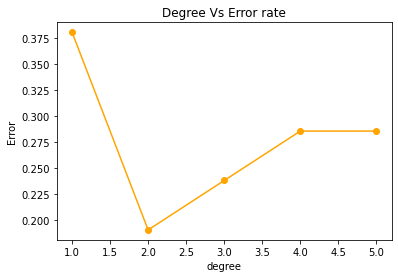

In [302]:
plt.plot([1,2,3,4,5],error,linestyle='-', marker='o', color='orange')
plt.title('Degree Vs Error rate')
plt.xlabel('degree')
plt.ylabel('Error')
plt.show()

We can observe that the error rate is minimum for degree = 2


#### b) Can you identify if you model is underfitting or overfitting? (Hint use cross validation error and in-sample error plot to identify high bias and high variance.) Plot the relationships.


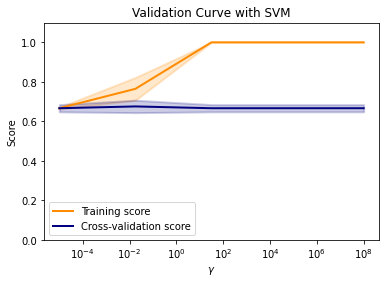

In [227]:
from sklearn.model_selection import validation_curve

# param_range = np.logspace(-6, -1, 5)
param_range = np.logspace(-5, 8, 5)

train_scores, test_scores = validation_curve(
    svm.SVC(), data_x, data_y, param_name="gamma", param_range=param_range,
    scoring="accuracy",cv=5, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()



For very low values of gamma, we can observe that both the training score and the validation score are at 0.6. This is not necessarily underfitting. Medium values of gamma will result in high values for only Training score while the cross validation score remains plateaued. If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is lower and same as with a lower gamma.